In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
data_normalized = pd.read_csv("Output/Preprocessed_CC_GENERAL.csv")


In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)

In [4]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)


In [5]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)


In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [7]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(
        data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]
    )
else:
    dbscan_silhouette = -1


In [8]:
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")


K-means Silhouette Score: 0.2506
DBSCAN Silhouette Score: 0.2165


In [9]:
plt.figure(figsize=(20, 10))  # Increase the figure size


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'Feature 2')

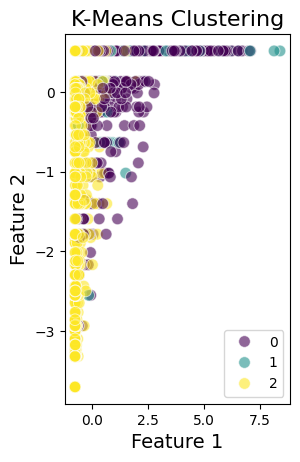

In [10]:
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=kmeans_labels, 
    palette="viridis", 
    legend='full',
    s=70,  # Marker size for better visibility
    alpha=0.6  # Transparency for overlapping points
)
plt.title("K-Means Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)


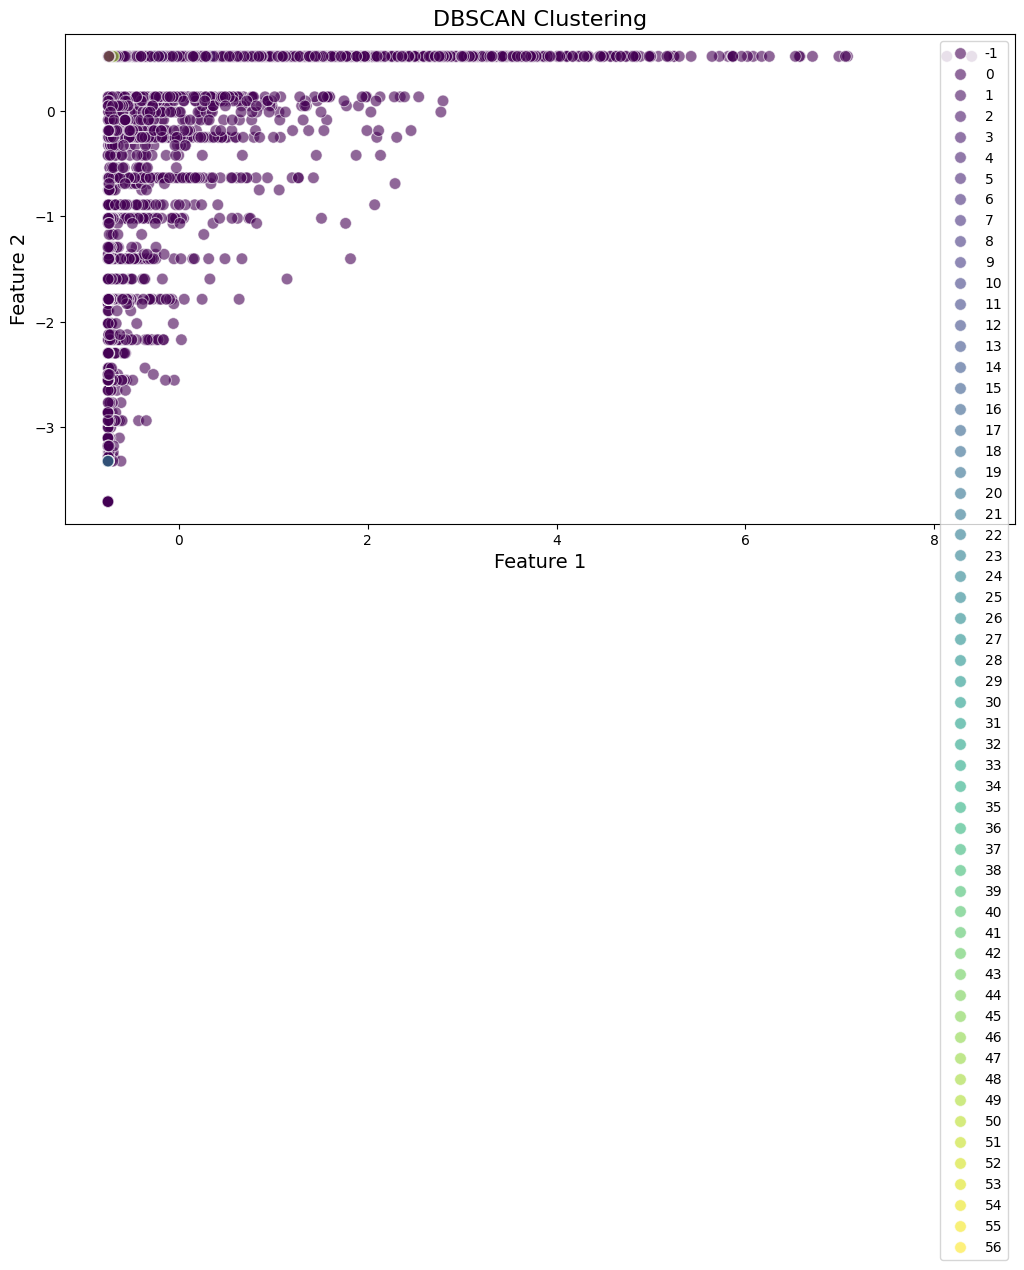

In [11]:
# Increase the figure size to avoid layout issues
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=dbscan_labels, 
    palette="viridis", 
    legend='full',
    s=70,
    alpha=0.6
)
plt.title("DBSCAN Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
if kmeans_silhouette > dbscan_silhouette:
    print("K-means is recommended as it has a higher silhouette score.")
else:
    print("DBSCAN is recommended as it has a higher silhouette score or better noise handling.")


K-means is recommended as it has a higher silhouette score.


In [13]:
new_value1 = 1.5  # Example value for feature 1
new_value2 = 2.5  # Example value for feature 2

# Create a new data point with 17 features (add zeros for missing features)
new_data = np.array([[new_value1, new_value2] + [0] * (data_normalized.shape[1] - 2)])

new_data_scaled = scaler.transform(new_data)


c:\Users\mmeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
kmeans_cluster = kmeans.predict(new_data_scaled)
print(f"KMeans: The new data point belongs to cluster {kmeans_cluster[0]}")

KMeans: The new data point belongs to cluster 2


In [15]:
neighbors = NearestNeighbors(radius=1.5).fit(data_scaled)  # Same eps value as DBSCAN
distances, indices = neighbors.radius_neighbors(new_data_scaled)

In [16]:
if len(indices[0]) > 0:
    print(f"DBSCAN: The new data point belongs to an existing cluster with indices {indices[0]}")
else:
    print("DBSCAN: The new data point is considered noise (label -1 in DBSCAN).")

DBSCAN: The new data point is considered noise (label -1 in DBSCAN).
